<a href="https://colab.research.google.com/github/lphtt7/Lecture-notes/blob/main/Exercise%2026%20-%20n-body%20problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Leith Arnold__
<br>
Date: Mar. 17, 2023
<br>
PHYS 2030 W23

__Rubric__ (100 points total):

- Part (a) /__80 points__
     
- Part (b) /__20 points__

# <center><font color=#46769B>Exercise 26: n-body problem</font></center>

## <font color=#46769B>Introduction</font>

Consider a general gravitational $n$-body problem using the leapfrog algorithm. That is, we have $n$ masses, each with their own position and velocity vectors:

$$\mathbf{r}_i(t) = (x_i(t), y_i(t), z_i(t) ) \, , \quad \mathbf{v}_a(t) = (v_{xi}(t), v_{yi}(t), v_{zi}(t) ) \, ,$$

where $i = 1, 2, ..., n$ labels the mass. Each mass exerts a gravitational force on all of the other masses, so the acceleration on mass $i$ is

$$\mathbf{a}_i  = \sum_{j=1\\i\ne j}^n \frac{G m_j \mathbf{r}_{ji}}{|\mathbf{r}_{ji}|^3}  \, .$$

In the previous exercises, you (probably) coded up your acceleration function using a "brute force" approach in which each term was coded up separately. This is not feasible once $n$ becomes large, so will we use a different approach here.

Before we outline the method, we will modify Newton's law of gravitation as follows:

$$\mathbf{a}_i  = \sum_{j=1}^n \frac{G m_j \mathbf{r}_{ji}}{(|\mathbf{r}_{ji}|^2 + \epsilon^2 )^{3/2}}  \, . \qquad (1)$$

The parameter $\epsilon$ is known as the __softening length__ and is introduced for practical purposes. The idea is that for fixed $h$, close flyby encounters between two masses can have a large error in their dynamics. Gravitational softening is a way of mitigating this effect. (The curious reader can learn more [here](https://astronomy.stackexchange.com/questions/50106/what-is-gravitational-softening-length)). Newtonian gravity is reproduced in the limit $\epsilon \to 0$, but a very small step $h$ is needed to reach this limit. 

Here, we will use Eq. (1) for our acceleration and set $\epsilon = 0.5$. Note that we don't need to restrict the sum with $i \ne j$ anymore since the $i=j$ term vanishes since $\mathbf{r}_{ii} = \mathbf{r}_i - \mathbf{r}_i = 0$ in the numerator.

Next, it is helpful to organize the positions and velocities in a different way that we did previously. Instead of defining long vector $\mathbf{r}$ and $\mathbf{v}$, each of length $3n$, we will define these quantities as *matrices* of size $n \times 3$:

$$\mathbf{r}(t) = \left(\begin{array}{ccc} x_1(t) &  y_1(t) &  z_1(t) \\ x_2(t) &  y_2(t) &  z_2(t) \\ & \vdots & \\
x_n(t) &  y_n(t) &  z_n(t) \end{array} \right) \, , \qquad
\mathbf{v}(t) = \left(\begin{array}{ccc} v_{x1}(t) &  v_{y1}(t) &  v_{z1}(t) \\ v_{x2}(t) &  v_{y2}(t) &  v_{z2}(t) \\ & \vdots & \\
v_{xn}(t) &  v_{yn}(t) &  v_{zn}(t) \end{array} \right) \, .$$

When we initialize our arrays to save our numerical solutions, we need to initialize them with a different dimension:

```py
r = np.zeros((num_steps+1,n,3))
v = np.zeros((num_steps+1,n,3))
```

Now, our `r` carries *three* indices, e.g., `r[i,j,k]` takes the `i`th timestep, `j`th mass $m_j$, and the `k`th component of $(x,y,z)$.

Next, consider how to code up the acceleration function. Your code will look like this:

```py
def accel(t,r):

    a = np.zeros((n,3))

    for i in range(n):
        for j in range(n):
        
            ri = r[i]
            rj = r[j]
            
            # Calculate acceleration and add appropriately to a

    return a
```

So, we have nested `for` loops that calculate the acceleration on mass `i` due to `j` for all combinations of `i` and `j`. Note that the `r` variable here is a $(n \times 3)$-dimensional array. The advantage of our structuring `r` like this is that we can easily get the `i`th mass's $\mathbf{r}_i(t)$ by simple indexing `r[i]`.

With these modifications, all the usual parts of the leapfrog algorithm as the same as before.

The goals of this exercise are:
- Gain experience with using leapfrog methods for $n$-body problems

Required reading:
- *Lesson 9: Leapfrog method*


## <font color=#46769B>Part (a):</font>

Write a code for the dynamics of $n=10$ bodies, subject to the softened gravitational force in Eq. (1). For simplicity, set $m=1$ for all masses. Also take units such that Newton's constant $G = 1$.

Take the following initial conditions for `r0` and `v0`: 
- Each is a $(n \times 3)$ matrix, where each element is randomly sampled from a normal distribution centered at $0$ and with width $\sigma_r = 1$ for `r0` and $\sigma_v = 0.5$ for `v0`.
- Calculate the mean 3D velocity of the masses at $t=0$ (the center-of-mass velocity):
$$v_{\rm CM} = \frac{1}{n} \sum_{i=1}^n \mathbf{v}_{i}(0)$$
and subtract this from `v0` to remove the center-of-mass motion from your initial condition.

With this initial condition, your task is to code up the leapfrog method for this system for $N=10^4$ time steps, spanning a time interval $[0,100]$.

Make a parametric plot of the trajectories of all particles in the $x$-$y$ plane. That is, do this
```py
plt.plot(x,y)
```
where `x` and `y` are the list of $x_i(t), y_i(t)$ values for all time steps for mass $i$. Plot all masses on the same plot, and make your figure a square shape with the same range on both $x$ and $y$ axes.


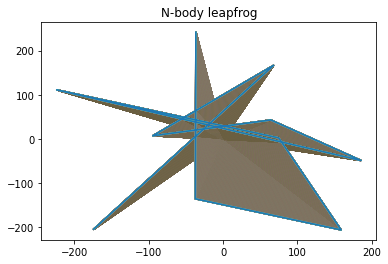

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Some definitions
n = 10
G = 1
eps = 0.5
m = 1
num_steps = 10**4

r0 = np.zeros((n,3))
v0 = np.zeros((n,3))

for i in range(n):
  for j in range(3):
    r0[i][j]= np.random.normal(0,1)
    v0[i][j]= np.random.normal(0,0.5)


# Velcoity of ceneter of mass
VCM = (1/n)*np.array([
    np.mean(v0[:,0]),
    np.mean(v0[:,1]),
    np.mean(v0[:,2])
])

# Initial velocity condition
v0 = v0-VCM

def accel(t,r):

    a = np.zeros((n,3))

    for i in range(n):
        for j in range(n):

            ri = r[i]
            rj = r[j]
            a[i] += (G*m*(ri-rj))/((np.linalg.norm(ri-rj)**2 + eps**2))**(3/2)

    return a


def leapfrog(num_steps):
  r = np.zeros((num_steps+1,n,3))
  v = np.zeros((num_steps+1,n,3))
  t = np.linspace(0,100,num = num_steps+1)
  h = t[1]- t[0]

  a = accel(t,r0)
  r[0]= r0
  v[0]= v0

  for i in range(num_steps):
    v_half = v[i]+h/2*a
    r[i+1]= r[i]+h*v_half
    a = accel(t[i+1],r[i+1])
    v[i+1]= v_half +h/2*a
  return t,r,v

t,r,v = leapfrog(num_steps)

for s in r:
  plt.plot(s[:,0],s[:,1])
plt.title("N-body leapfrog")
plt.show()


## <font color=#46769B>Part (b):</font>

Next, we will use a package called `celluloid` to make an animation of your $n$-body simulation.     
The basic idea of `celluloid` is that you make a series of plots, take a snapshot of each one, and then each snapshot becomes a frame in an animation.

If you are running your code in Colab, you need to uncomment the second line `!pip install celluloid`.

Your task is to take your results from Part (a) and run the following code to make an animation. Feel free to modify anything here as you like.


In [15]:
# Uncomment this next line in Google Colab
!pip install celluloid  

from celluloid import Camera
from IPython.display import HTML

fig = plt.figure(figsize=(8,8))
camera = Camera(fig)

plt.xlim([-10,10])
plt.ylim([-10,10])

t,r,v = leapfrog(num_steps)
num_steps = len(t)-1

skip = 50 # Only includes every 50th time step

for i in range(10,num_steps,skip):
    for j in range(n):
        plt.plot(r[i-10:i,j,0],r[i-10:i,j,1],'.')
    
    camera.snap()
    
animation = camera.animate(interval=20)
plt.close()

HTML(animation.to_html5_video())

# Saving a video (uncomment this line)
# animation.save('n_body_motions.mp4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
